# Functions

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        plt.boxplot(df[column_name],patch_artist=True, notch=True)
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)


        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')

        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
            
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
       

    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df[num_vars], hue='Status')
    
    df_melted = df.melt(id_vars=target_variable, value_vars=num_vars)

    # Create a box plot categorized by the categorical variable on the y-axis
    sns.catplot(x='variable', y='value', hue=target_variable, kind='box', data=df_melted, height=6, aspect=2)

    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    # drop grade and status
    cat_vars = cat_vars.drop('Grade')
    cat_vars = cat_vars.drop('Status')
    
    for i,cat_var in enumerate(cat_vars):
        # Calculate the row and column number for the subplot knowing there are 3 columns and 3 rows
        row = i//3
        col = i%3
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA','IIB','IIIA','IIIB','IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = pd.Series(df[cat_var].unique())
        
        fig, ax = join_barcharts(cat_var_positive, cat_var_negative, classes, title=cat_var, xlabel=cat_var, ylabel='Proportion', legend_labels=('Alive', 'Dead'))

def join_barcharts(data1, data2, labels, title='', xlabel='', ylabel='', legend_labels=('Positive', 'Negative')):
    
    n = len(labels)
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(nrows=3, ncols=3)
    index = np.arange(n)
    rects1 = ax.bar(index, data1, width, label=legend_labels[0])
    rects2 = ax.bar(index + width, data2, width, label=legend_labels[1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()
    


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_analysis_numerical(df, column_name):
    # Check if the column is numerical
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column_name])
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        if 'ext_univar_outlier' not in df.columns:
            df['ext_univar_outlier'] = 0
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)

        plt.title('Box Plot')
        plt.subplot(1, 3, 3)
        sns.boxplot(df[column_name],patch_artist=True, notch=True)
        plt.title('Box Plot')
        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df
    
def univariate_analysis_categorical(df, column_name):
    # Check if the column is categorical
    if df[column_name].dtype == 'object':
        # Plot bar chart
        if column_name == 'differentiate':
            # change the names
            df[column_name] = df[column_name].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                                       "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
            # plot the graph following the order
            plt.figure()
            sns.countplot(x=df[column_name], order=['well diff', 'mod diff', 'poor diff', 'undiff'])
            plt.title('Bar Chart')
        elif column_name == '6th Stage':
            plt.figure()
            sns.countplot(x=df[column_name], order=['IIA','IIB','IIIA','IIIB','IIIC'])
            plt.title('Bar Chart')
        else:
            plt.figure()
            sns.countplot(x=df[column_name])
            plt.title('Bar Chart')
        plt.show()
    else:
        print("The specified column is not categorical.")

def bivariate_numerical(df):
    target_variable = 'Status'
    num_vars = df.select_dtypes(include=['int64', 'float64']).columns
    
    sns.pairplot(df, hue='Status')
    plt.show()

def bivariate_categorical(df):
    target_variable = 'Status'
    cat_vars = df.select_dtypes(include=['object']).columns
    # drop grade and status
    cat_vars = cat_vars.drop('Grade')
    cat_vars = cat_vars.drop('Status')
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))

    for i, cat_var in enumerate(cat_vars):
        # Calculate the row and column number for the subplot knowing there are 3 columns and 3 rows
        row = i // 3
        col = i % 3
        if cat_var == '6th Stage':
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = ['IIA','IIB','IIIA','IIIB','IIIC']
        else:
            if cat_var == 'differentiate':
                df[cat_var] = df[cat_var].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                               "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
        
            cat_var_positive = df[df[target_variable] == 'Alive'][cat_var].value_counts(normalize=True)
            cat_var_negative = df[df[target_variable] == 'Dead'][cat_var].value_counts(normalize=True)
            classes = pd.Series(df[cat_var].unique())

        width = 0.35
        index = np.arange(len(classes))
        axes[row, col].bar(index, cat_var_positive, width, label='Alive')
        axes[row, col].bar(index + width, cat_var_negative, width, label='Dead')

        axes[row, col].set_xlabel(cat_var)
        axes[row, col].set_ylabel('Proportion')
        axes[row, col].set_title(cat_var)
        axes[row, col].set_xticks(index + width / 2)
        axes[row, col].set_xticklabels(classes)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()



In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Breast_Cancer.csv")
df_p = pd.read_csv("Breast_Cancer_Preprocessed_Cat.csv")


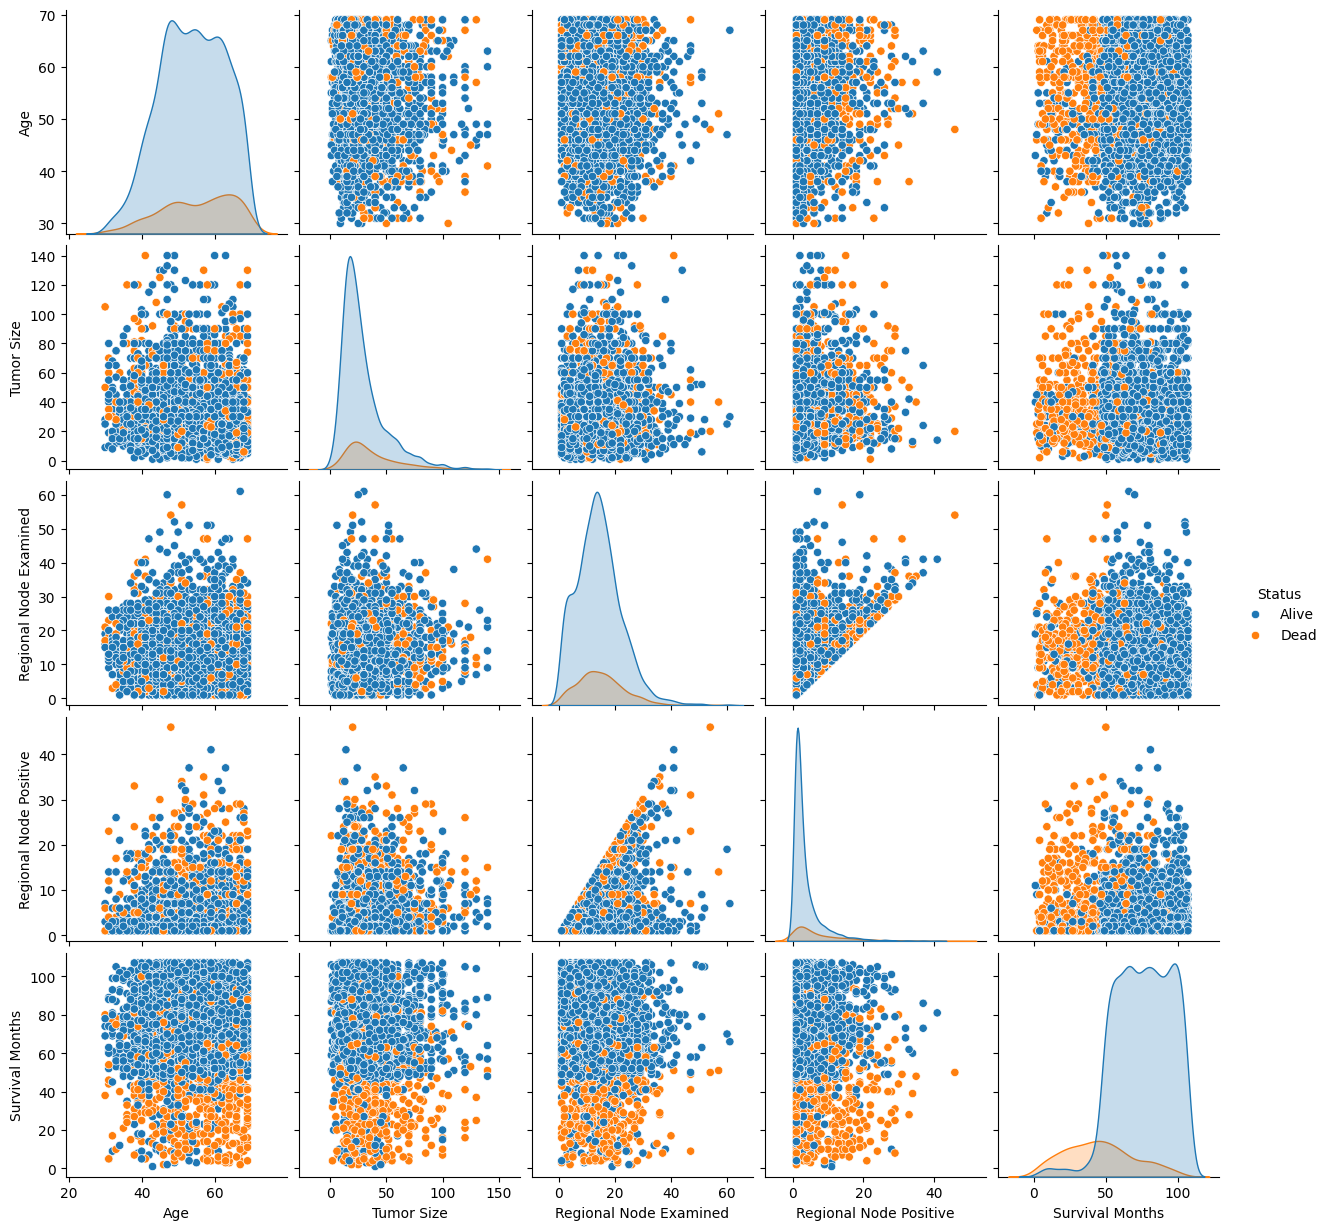

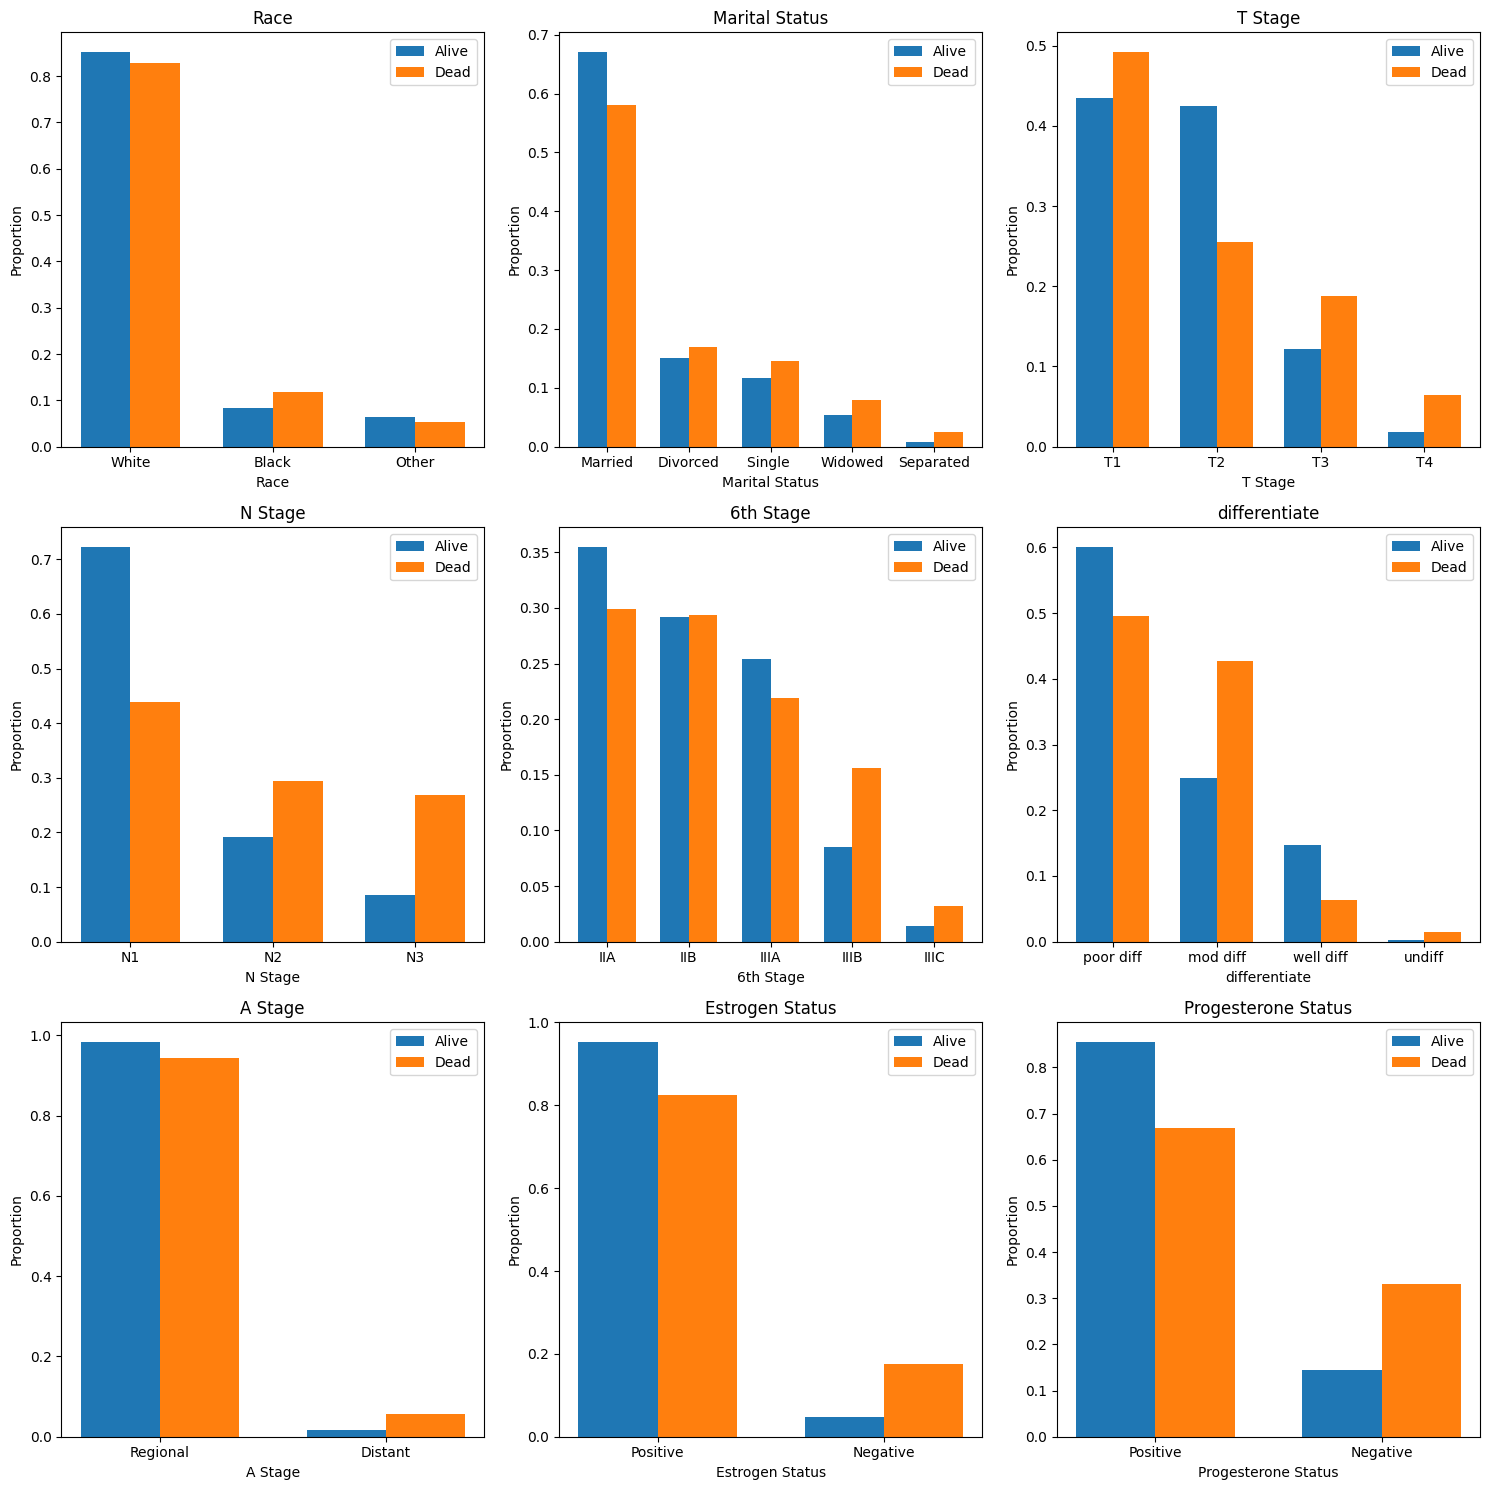

In [42]:
bivariate_numerical(df)
bivariate_categorical(df)

# Importing the Dataset

c:\Users\Admin\Desktop\MASTER\Q2\ML\course project


AttributeError: 'numpy.ndarray' object has no attribute 'bar'

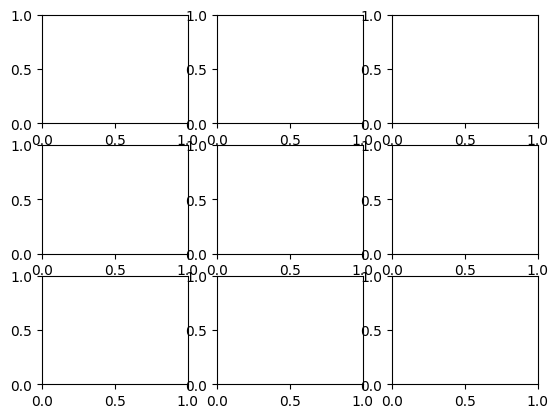

In [23]:
import pandas as pd
import os
#parent_directory = os.path.dirname(os.getcwd())
#os.chdir(parent_directory)
print(os.getcwd())
#EDA on numerical variables
# Load the dataset

df_breast_cancer = pd.read_csv('data/Breast_Cancer.csv', sep=",", header=0)
'''df_breast_cancer["ext_univar_outlier"] = 0

for column in df_breast_cancer.columns:
    if column not in ['ext_univar_outlier']:
        #df_breast_cancer = univariate_analysis_numerical(df_breast_cancer, column)
        univariate_analysis_categorical(df_breast_cancer, column)
df_breast_cancer.to_csv('data/Breast_Cancer_outliers.csv', index=False)'''
#bivariate_numerical(df_breast_cancer[['Age', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive','Survival Months','Status']])
bivariate_categorical(df_breast_cancer)


Proceso Numericas a Categoricas

In [33]:
import pandas as pd

# Load the preprocessed dataset
df_breast_cancer = pd.read_csv('Breast_Cancer_Preprocessed.csv')

# Reverse stage mappings
stage_reverse_mapping = {
    0: 'IIA',
    1: 'IIB',
    2: 'IIIA',
    3: 'IIIB',
    4: 'IIIC'
}
df_breast_cancer['6th Stage'] = df_breast_cancer['6th Stage'].map(stage_reverse_mapping)

t_stage_reverse_mapping = {
    0: 'T0',
    1: 'T1',
    2: 'T2',
    3: 'T3',
    4: 'T4'
}
df_breast_cancer['T Stage'] = df_breast_cancer['T Stage'].map(t_stage_reverse_mapping)

n_stage_reverse_mapping = {
    0: 'N0',
    1: 'N1',
    2: 'N2',
    3: 'N3',
    4: 'N4'
}
df_breast_cancer['N Stage'] = df_breast_cancer['N Stage'].map(n_stage_reverse_mapping)

a_stage_reverse_mapping = {
    0: 'Regional',
    1: 'Distant',
}
df_breast_cancer['A Stage'] = df_breast_cancer['A Stage'].map(a_stage_reverse_mapping)

# Reverse differentiation mapping
diff_reverse_mapping = {
    0: 'Well differentiated',
    1: 'Moderately differentiated',
    2: 'Poorly differentiated',
    3: 'Undifferentiated'
}
df_breast_cancer['differentiate'] = df_breast_cancer['differentiate'].map(diff_reverse_mapping)

# Reverse status mappings
es_status_reverse_mapping = {
    0: 'Negative',
    1: 'Positive'
}
df_breast_cancer['Estrogen Status'] = df_breast_cancer['Estrogen Status'].map(es_status_reverse_mapping)
df_breast_cancer['Progesterone Status'] = df_breast_cancer['Progesterone Status'].map(es_status_reverse_mapping)

status_reverse_mapping = {
    1: 'Alive',
    0: 'Dead'
}
df_breast_cancer['Status'] = df_breast_cancer['Status'].map(status_reverse_mapping)

# Display the first few rows of the DataFrame to verify the reverse mappings
print(df_breast_cancer.head())


   Age   Race Marital Status T Stage N Stage 6th Stage  \
0   48  Other        Single       T2      N1       IIB   
1   47  White        Married      T2      N1       IIB   
2   65  White        Married      T1      N1       IIA   
3   49  Black      Separated      T1      N3      IIIC   
4   49  White       Divorced      T2      N1       IIB   

               differentiate   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated  Regional          23        Positive   
1      Poorly differentiated  Regional          39        Positive   
2        Well differentiated  Regional           8        Positive   
3        Well differentiated   Distant          12        Positive   
4  Moderately differentiated  Regional          38        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  \
0            Positive                       9                       1   
1            Positive                      29                       1   
2          

In [34]:
df_breast_cancer.to_csv('Breast_Cancer_Preprocessed_Cat.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:37: UserWarning: 
The palette list has fewer values (2) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:37: UserWarning: 
The palette list has fewe

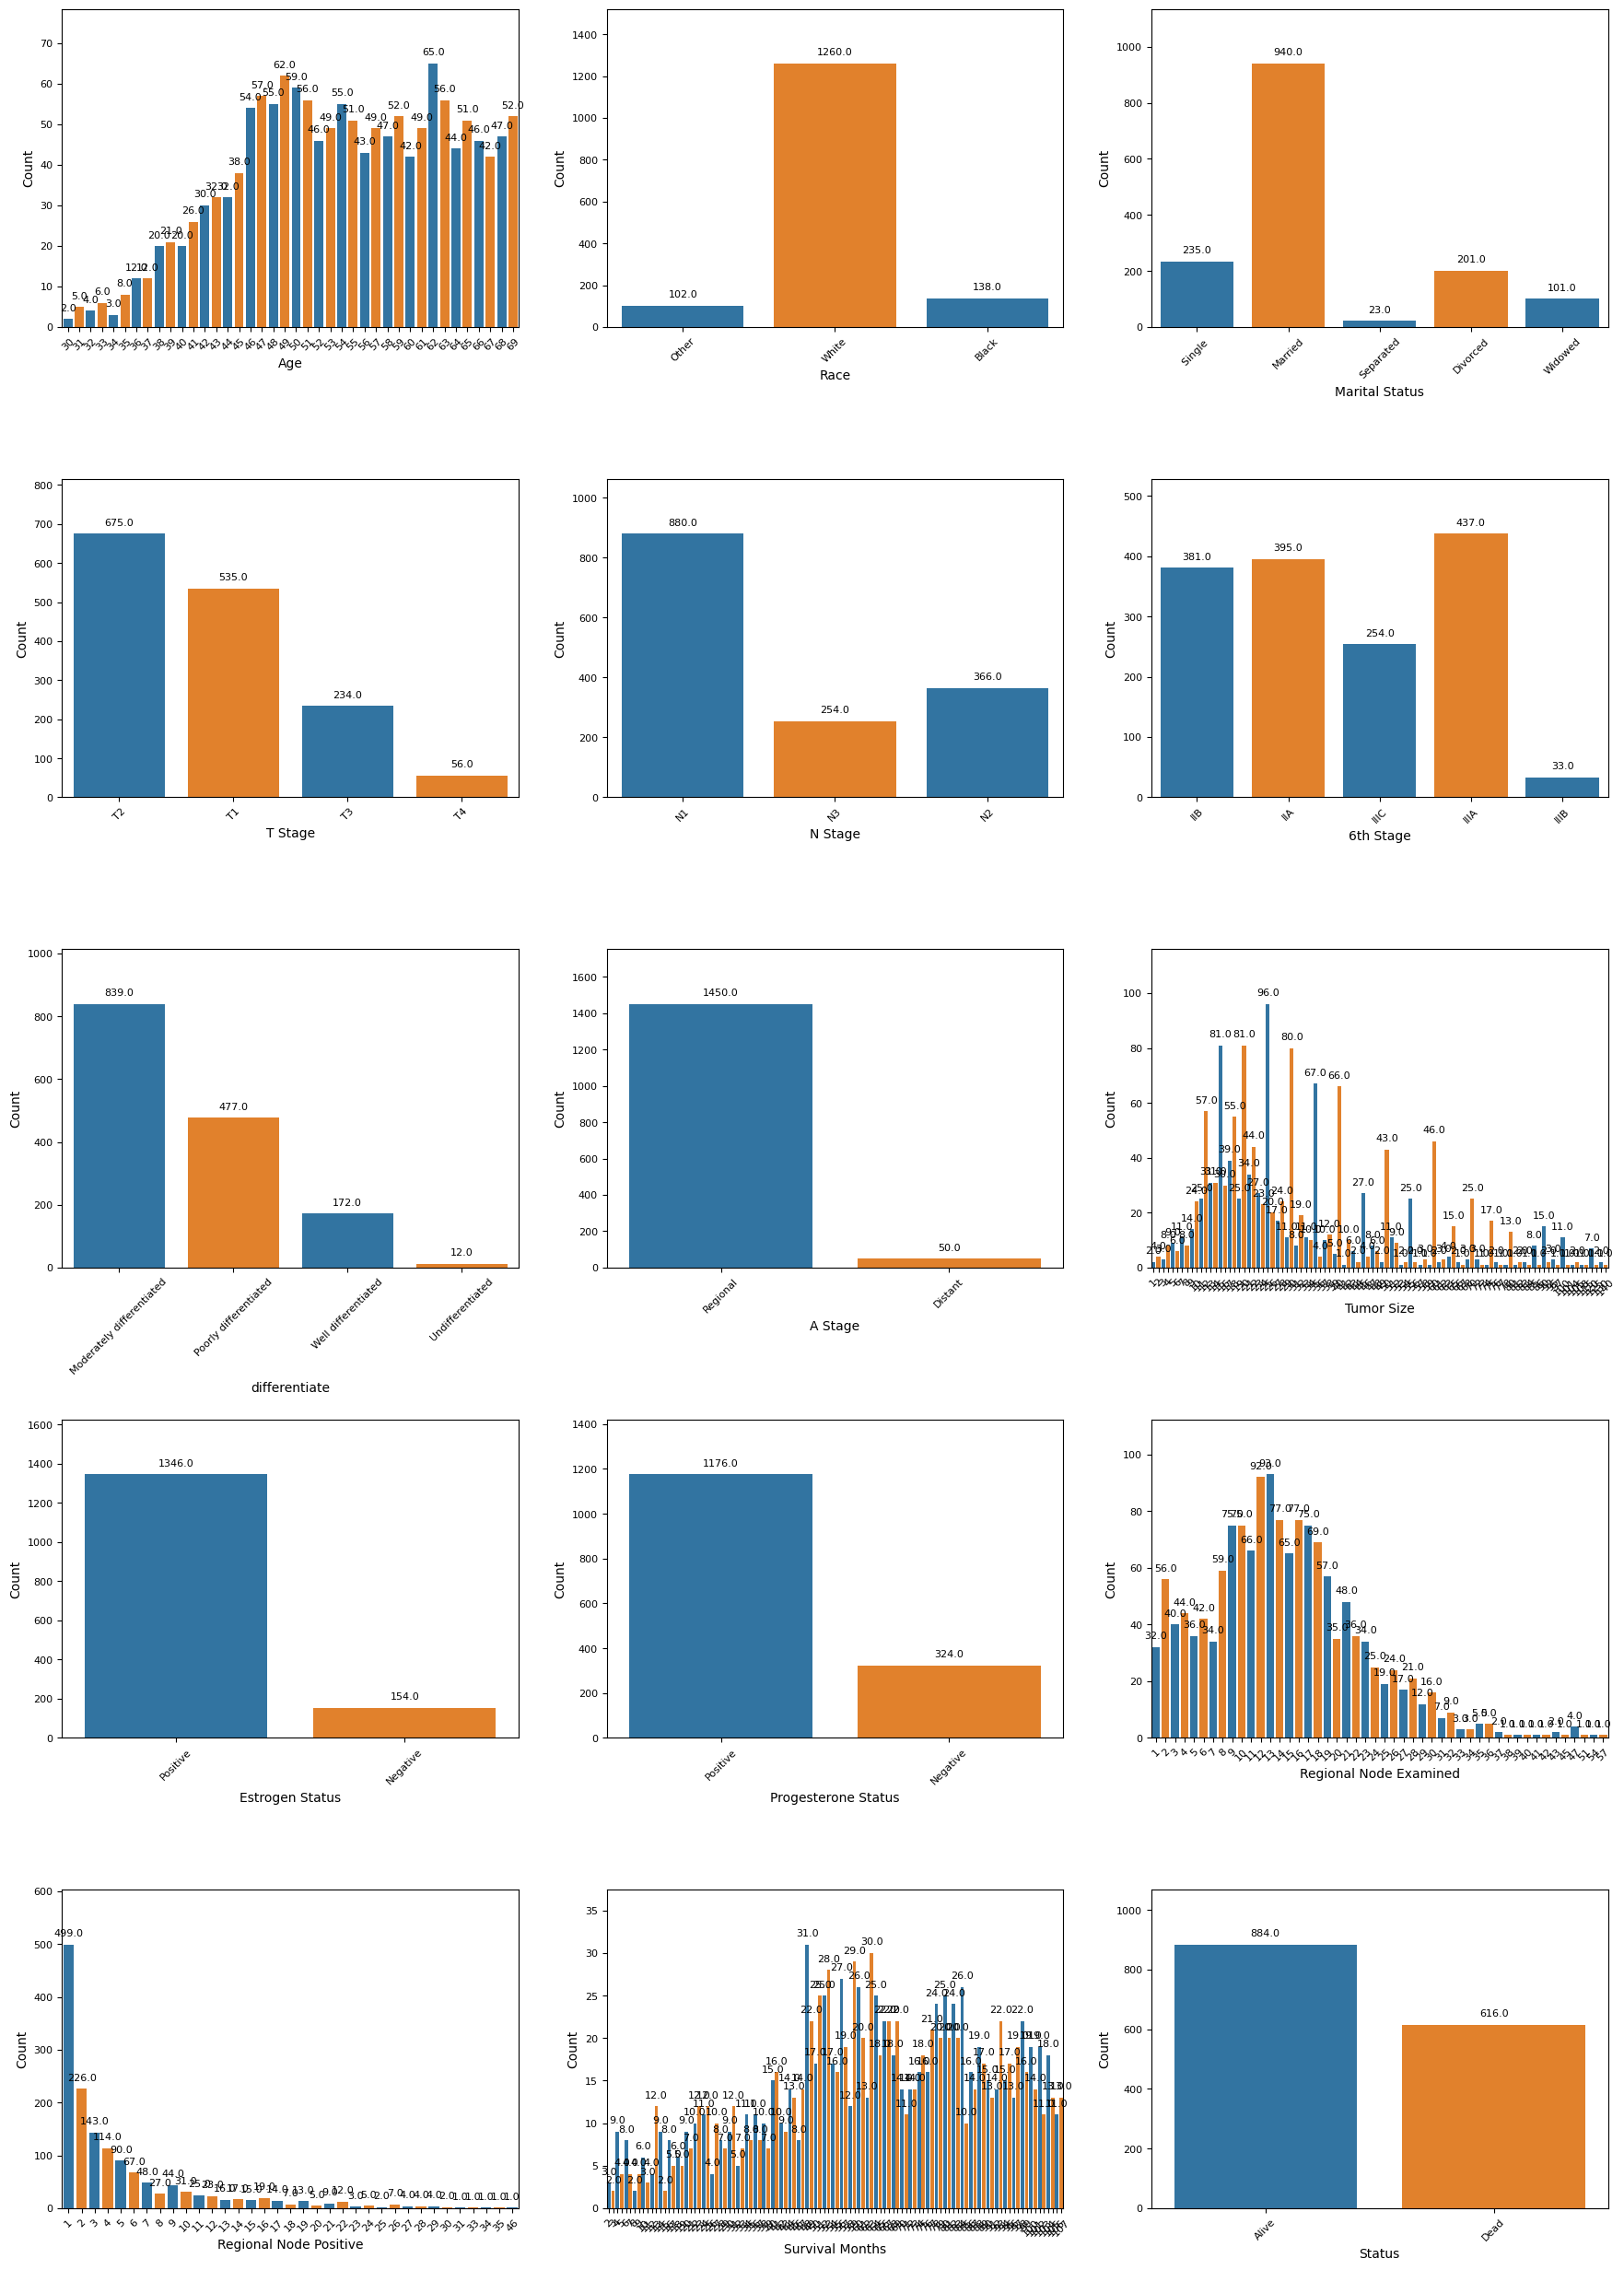

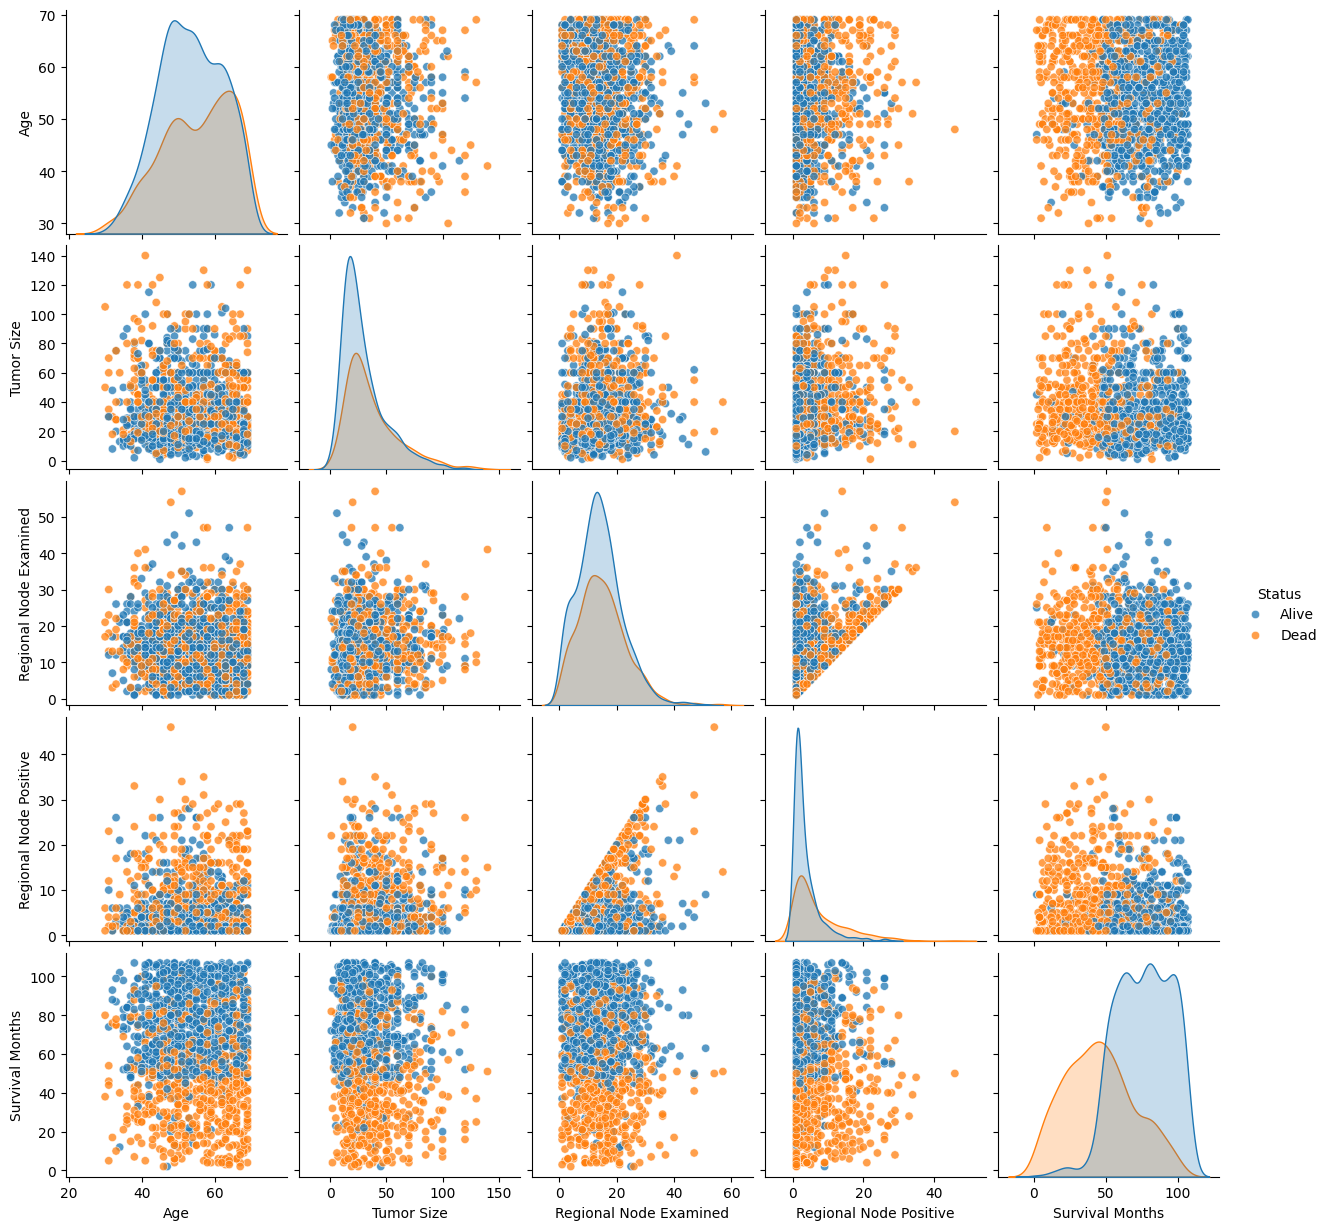

C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\1256285402.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xtic

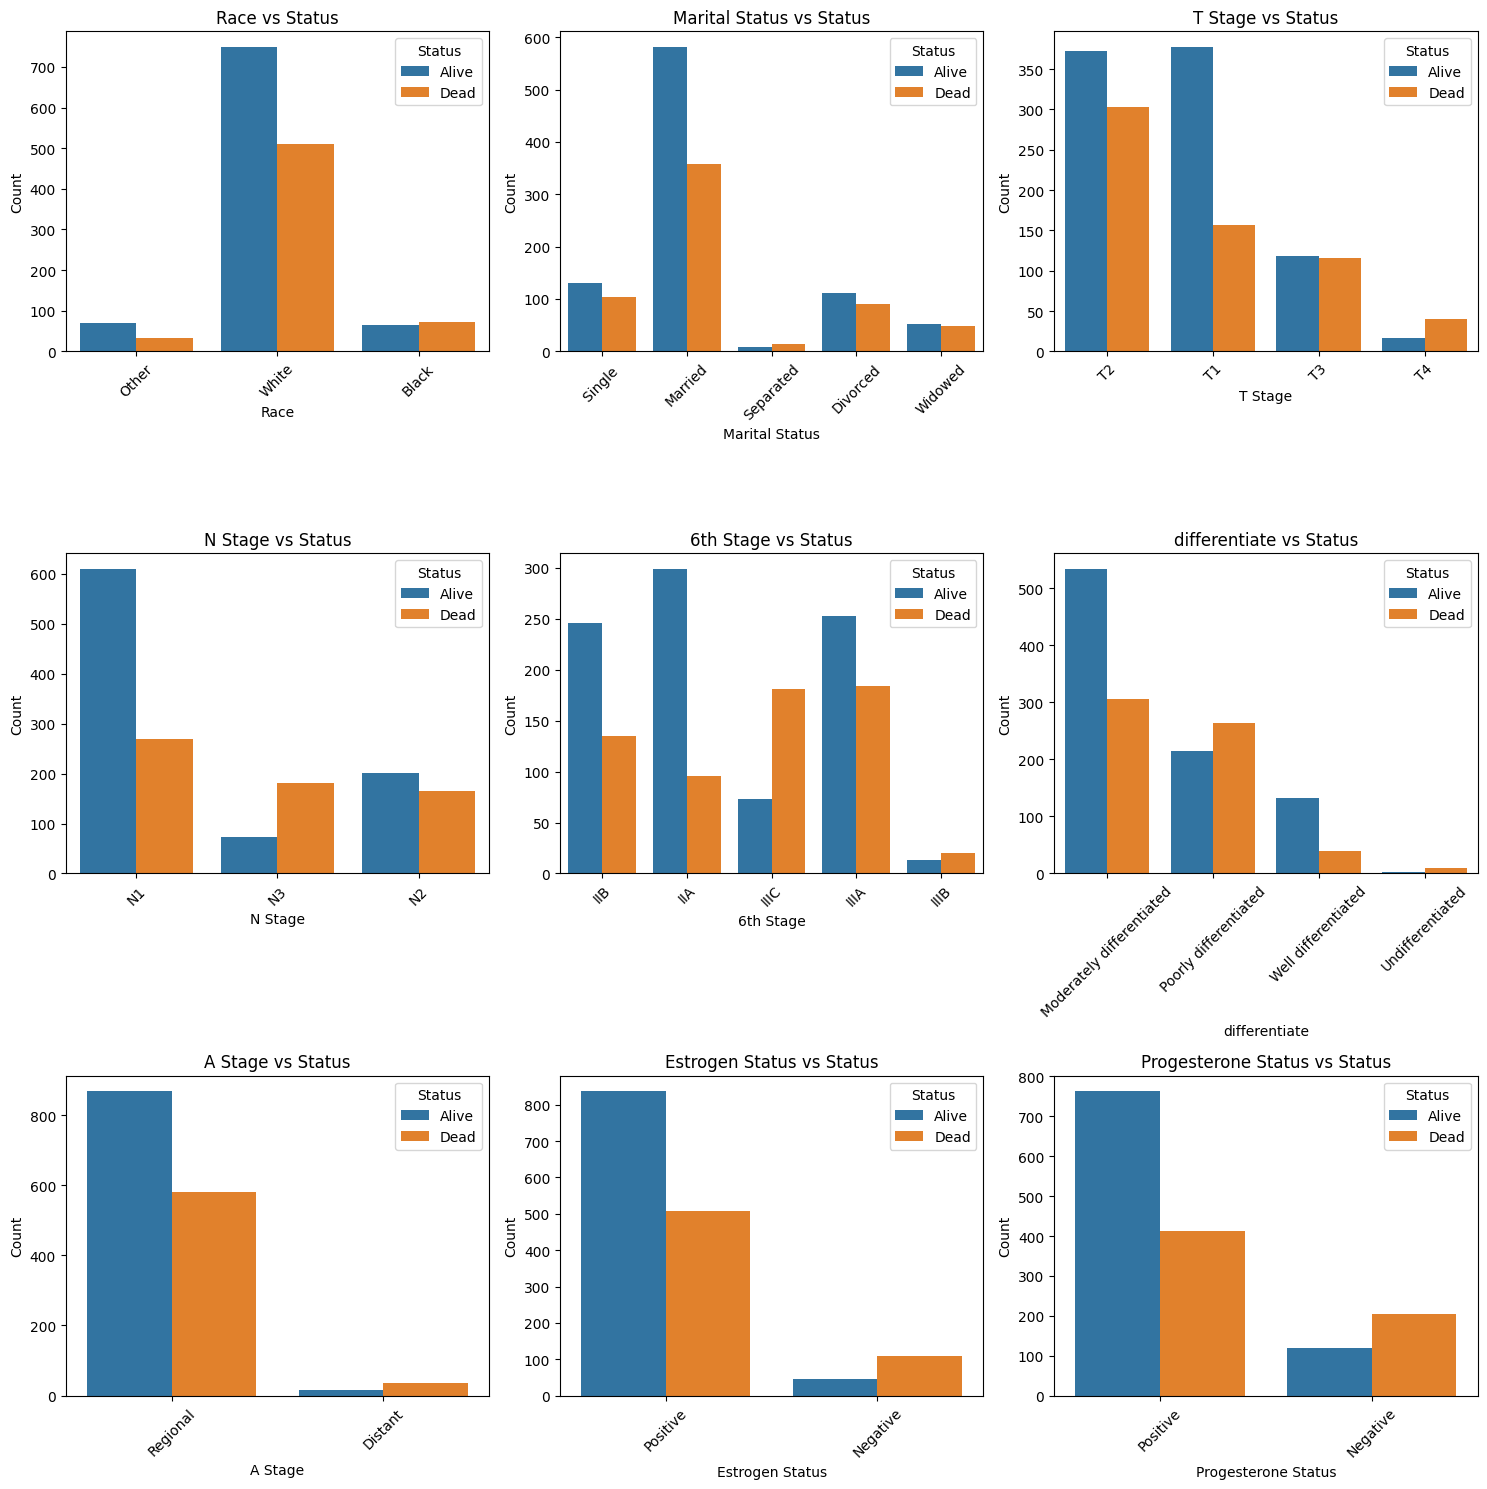

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV into a DataFrame
breast_cancer = pd.read_csv("Breast_Cancer_Preprocessed_Cat.csv")

# Function to split categorical and numerical columns
def split_cat_num_columns(df):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    return cat_cols, num_cols

# 1. Description of Final Dataset
def plot_dataframe(df):
    cat_cols, num_cols = split_cat_num_columns(df)
    
    # Define custom color palette
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

    # Create figure and axes
    num_plots = len(df.columns)
    num_rows = (num_plots - 1) // 3 + 1
    num_cols = min(num_plots, 3)  # Adjust number of columns to minimum of 3 or actual number of columns
    fig, axes = plt.subplots(5, 3, figsize=(18, 5*5))

    # Set axis labels font properties
    font_props = {'fontsize': 10}

    # Plot each variable
    for i, col in enumerate(df.columns):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        if col < len(df.columns):
            if col < len(cat_cols):
                sns.countplot(x=df.columns[i], data=df, ax=ax, palette=colors)
                ax.set_xlabel(df.columns[i], fontdict=font_props)
                ax.set_ylabel('Count', fontdict=font_props)

                # Add numbers on top of the bars
                for p in ax.patches:
                    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)
            else:
                if df.columns[i] in num_cols:
                    sns.histplot(x=df.columns[i], data=df, ax=ax, color=colors[0], kde=True, stat="density")
                    kde_color = colors[1]  # Orange color for the kernel density plot
                    sns.kdeplot(x=df.columns[i], data=df, ax=ax, color=kde_color, lw=1.5)
                    ax.set_xlabel(df.columns[i], fontdict=font_props)
                    ax.set_ylabel('Density', fontdict=font_props)
                else:
                    ax.axis('off')  # If the column is categorical and not numerical, omit the plot

            # Rotate x-axis labels
            ax.tick_params(axis='x', labelrotation=45)
            ax.tick_params(axis='both', labelsize=8)

            # Adjust y-axis limit to leave space for the numbers
            ax.set_ylim(0, ax.get_ylim()[1] * 1.15)
        else:
            fig.delaxes(ax)

    # Adjust spacing between subplots
    plt.tight_layout(pad=2.0)

    # Display the plot without the messages
    plt.show()

# 2. Bivariate Numerical Exploratory Analysis
def bivariate_numerical_exploratory_analysis(df, target):
    plt.rcParams['font.size'] = 10
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange
    sns.pairplot(df, hue=target, palette=colors, plot_kws={'alpha': 0.75})
    plt.show()

# 3. Plot Categorical Variables
def plot_categorical_variables(data, target):
    categorical_vars = data.select_dtypes(include=['object', 'category']).columns
    categorical_vars = categorical_vars.drop(target)  # Exclude the target variable
    
    num_plots = len(categorical_vars)
    num_cols = 3  # Number of columns in the subplot grid
    num_rows = (num_plots - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
    axes = axes.flatten()
    for i, var in enumerate(categorical_vars):
        sns.countplot(x=var, hue=target, data=data, ax=axes[i], palette=['#1f77b4', '#ff7f0e'])  # Blue and orange
        axes[i].set_title(f'{var} vs {target}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('Count')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        axes[i].legend(title=target)

    # Hide empty subplots
    for j in range(i + 1, num_plots):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the functions with the 'breast_cancer' DataFrame
plot_dataframe(breast_cancer)
bivariate_numerical_exploratory_analysis(breast_cancer, 'Status')
plot_categorical_variables(breast_cancer, "Status")


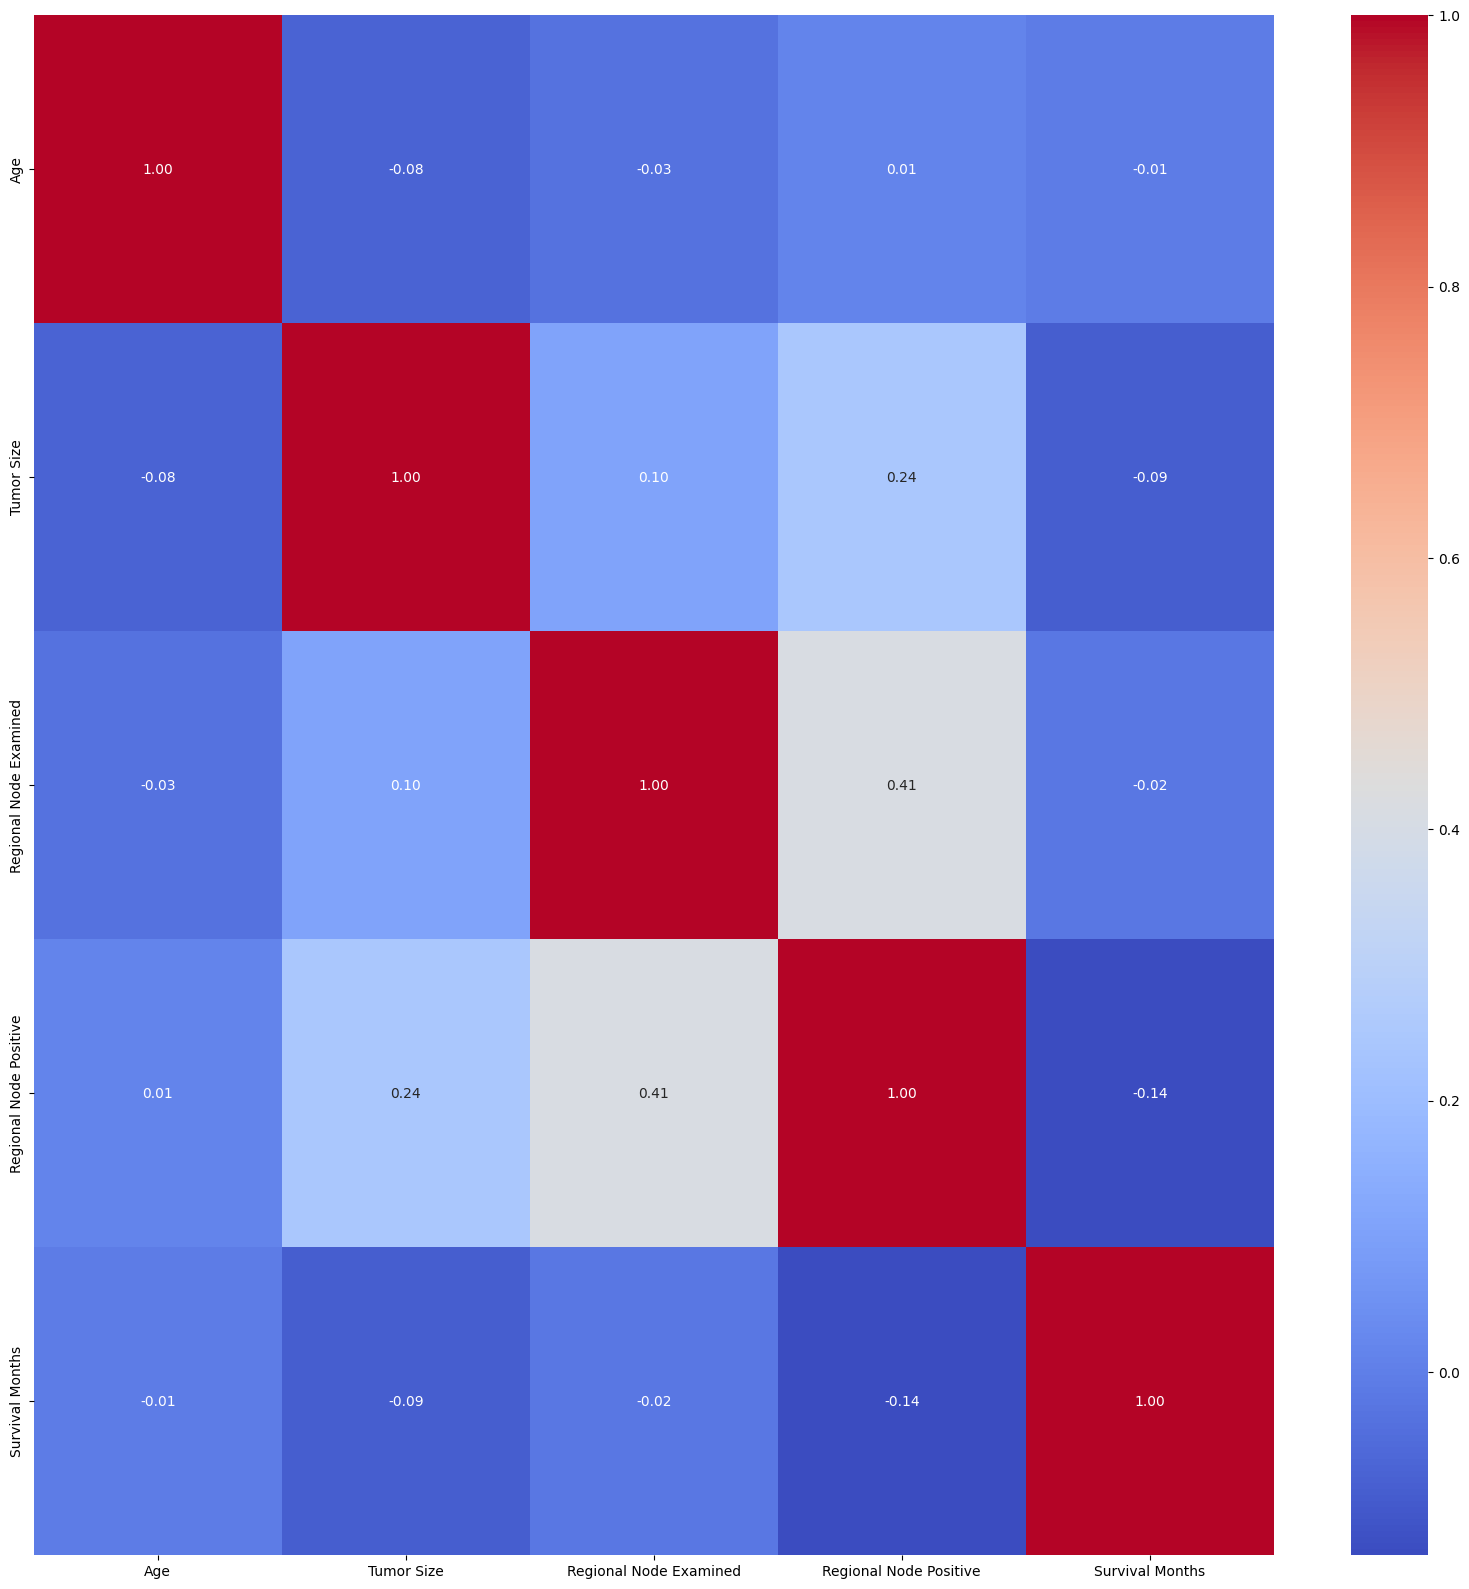

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.savefig('data/Correlation_Matrix.png')
plt.show()


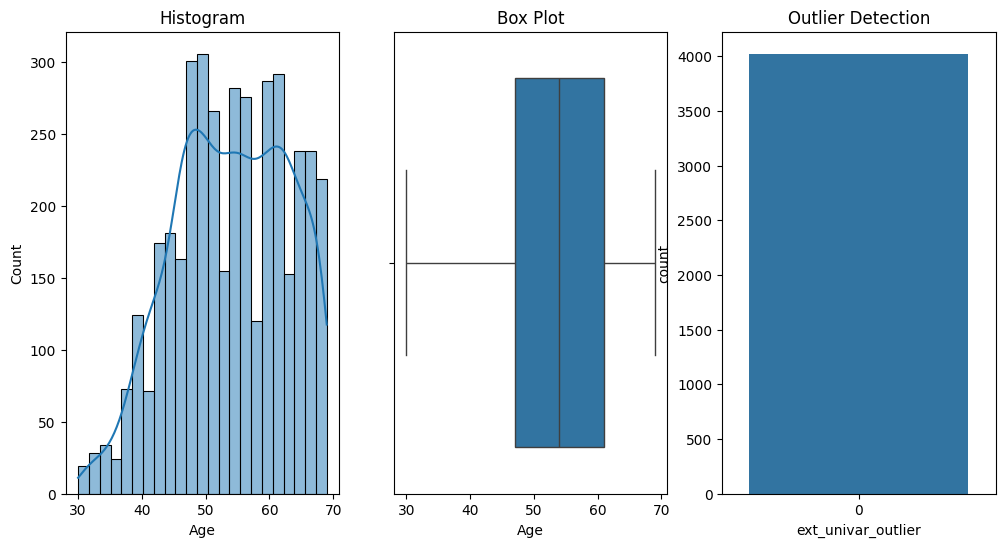

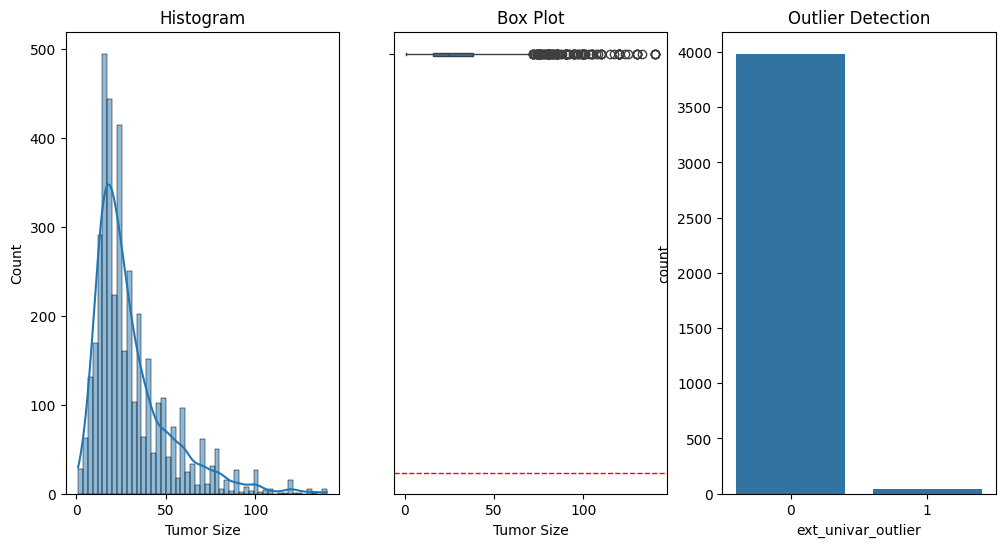

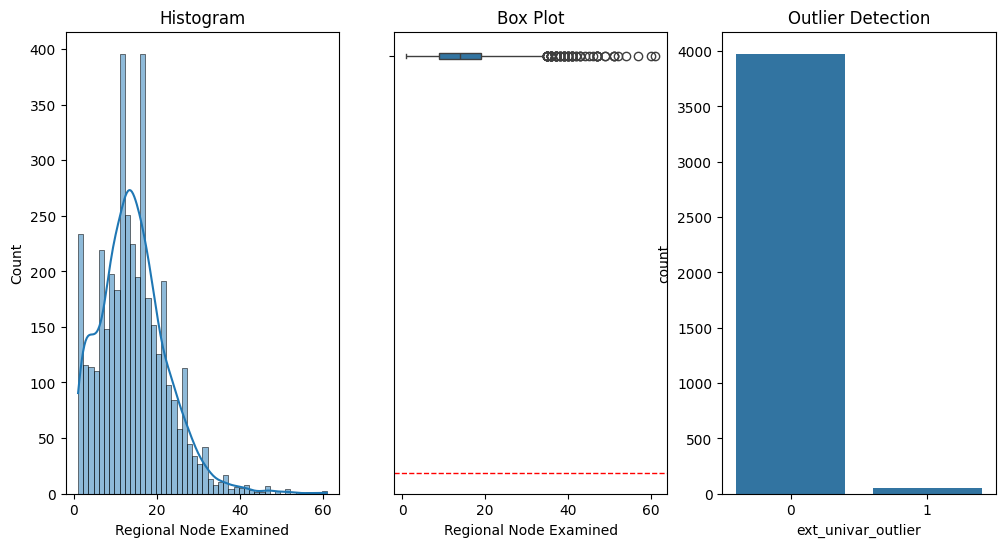

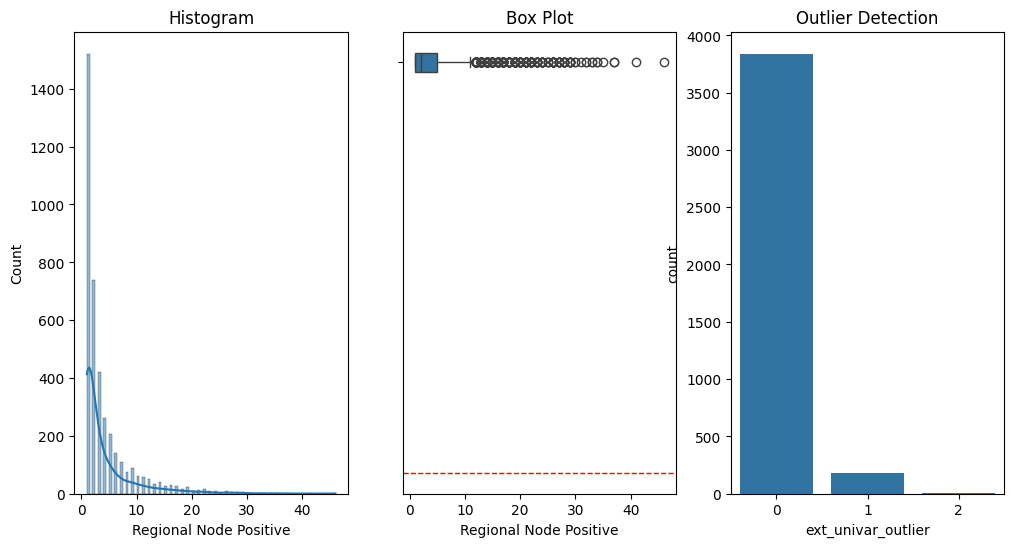

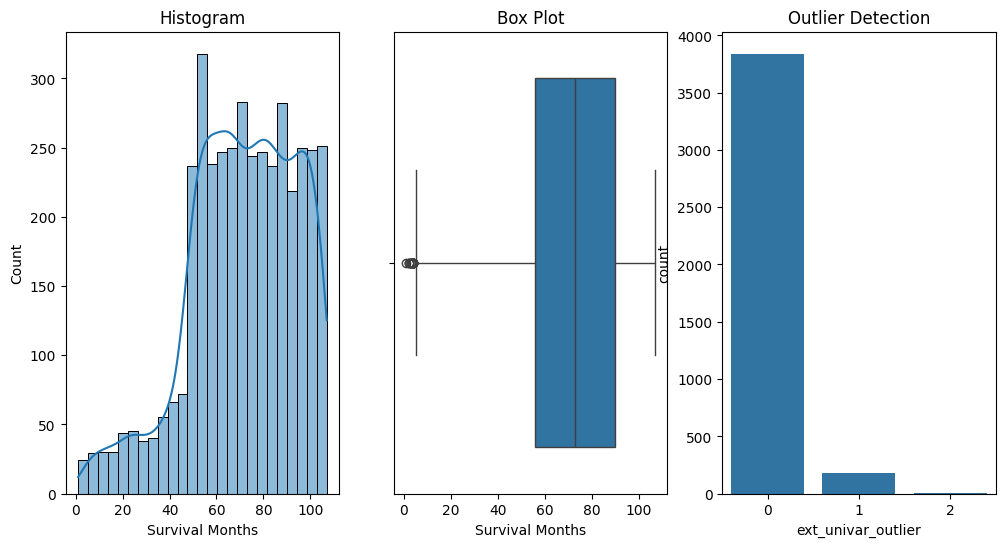

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the functions

def univariate_analysis_numerical(df, column_name):
    # Your existing code here
    if df[column_name].dtype in ['int64', 'float64']:
        # Plot histogram
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 3, 1)
        sns.histplot(df[column_name], kde=True)
        plt.title('Histogram')

        # Plot boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column_name])
        # Detect those values that are extreme outliers, more than 3 times the IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        # Add one to the column named ext_univar_outlier
        if 'ext_univar_outlier' not in df.columns:
            df['ext_univar_outlier'] = 0
        outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
        df.loc[outliers, 'ext_univar_outlier'] += 1

        # check if any outliers are over the upper bound
        if df[column_name].max() > upper_bound:
            plt.axhline(y=upper_bound, color='r', linestyle='--', linewidth=1)
        if df[column_name].min() < lower_bound:
            plt.axhline(y=lower_bound, color='r', linestyle='--', linewidth=1)

        plt.title('Box Plot')

        # Visualize outlier detection
        plt.subplot(1, 3, 3)
        sns.countplot(x='ext_univar_outlier', data=df)
        plt.title('Outlier Detection')
        
        plt.show()
        return df

    else:
        print("The specified column is not numerical.")
        return df

# Load the dataset
df = pd.read_csv("Breast_Cancer.csv")
df_p = pd.read_csv("Breast_Cancer_Preprocessed_Cat.csv")

# Perform univariate analysis for numerical variables and outlier analysis
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
for var in numerical_vars:
    df = univariate_analysis_numerical(df, var)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ip

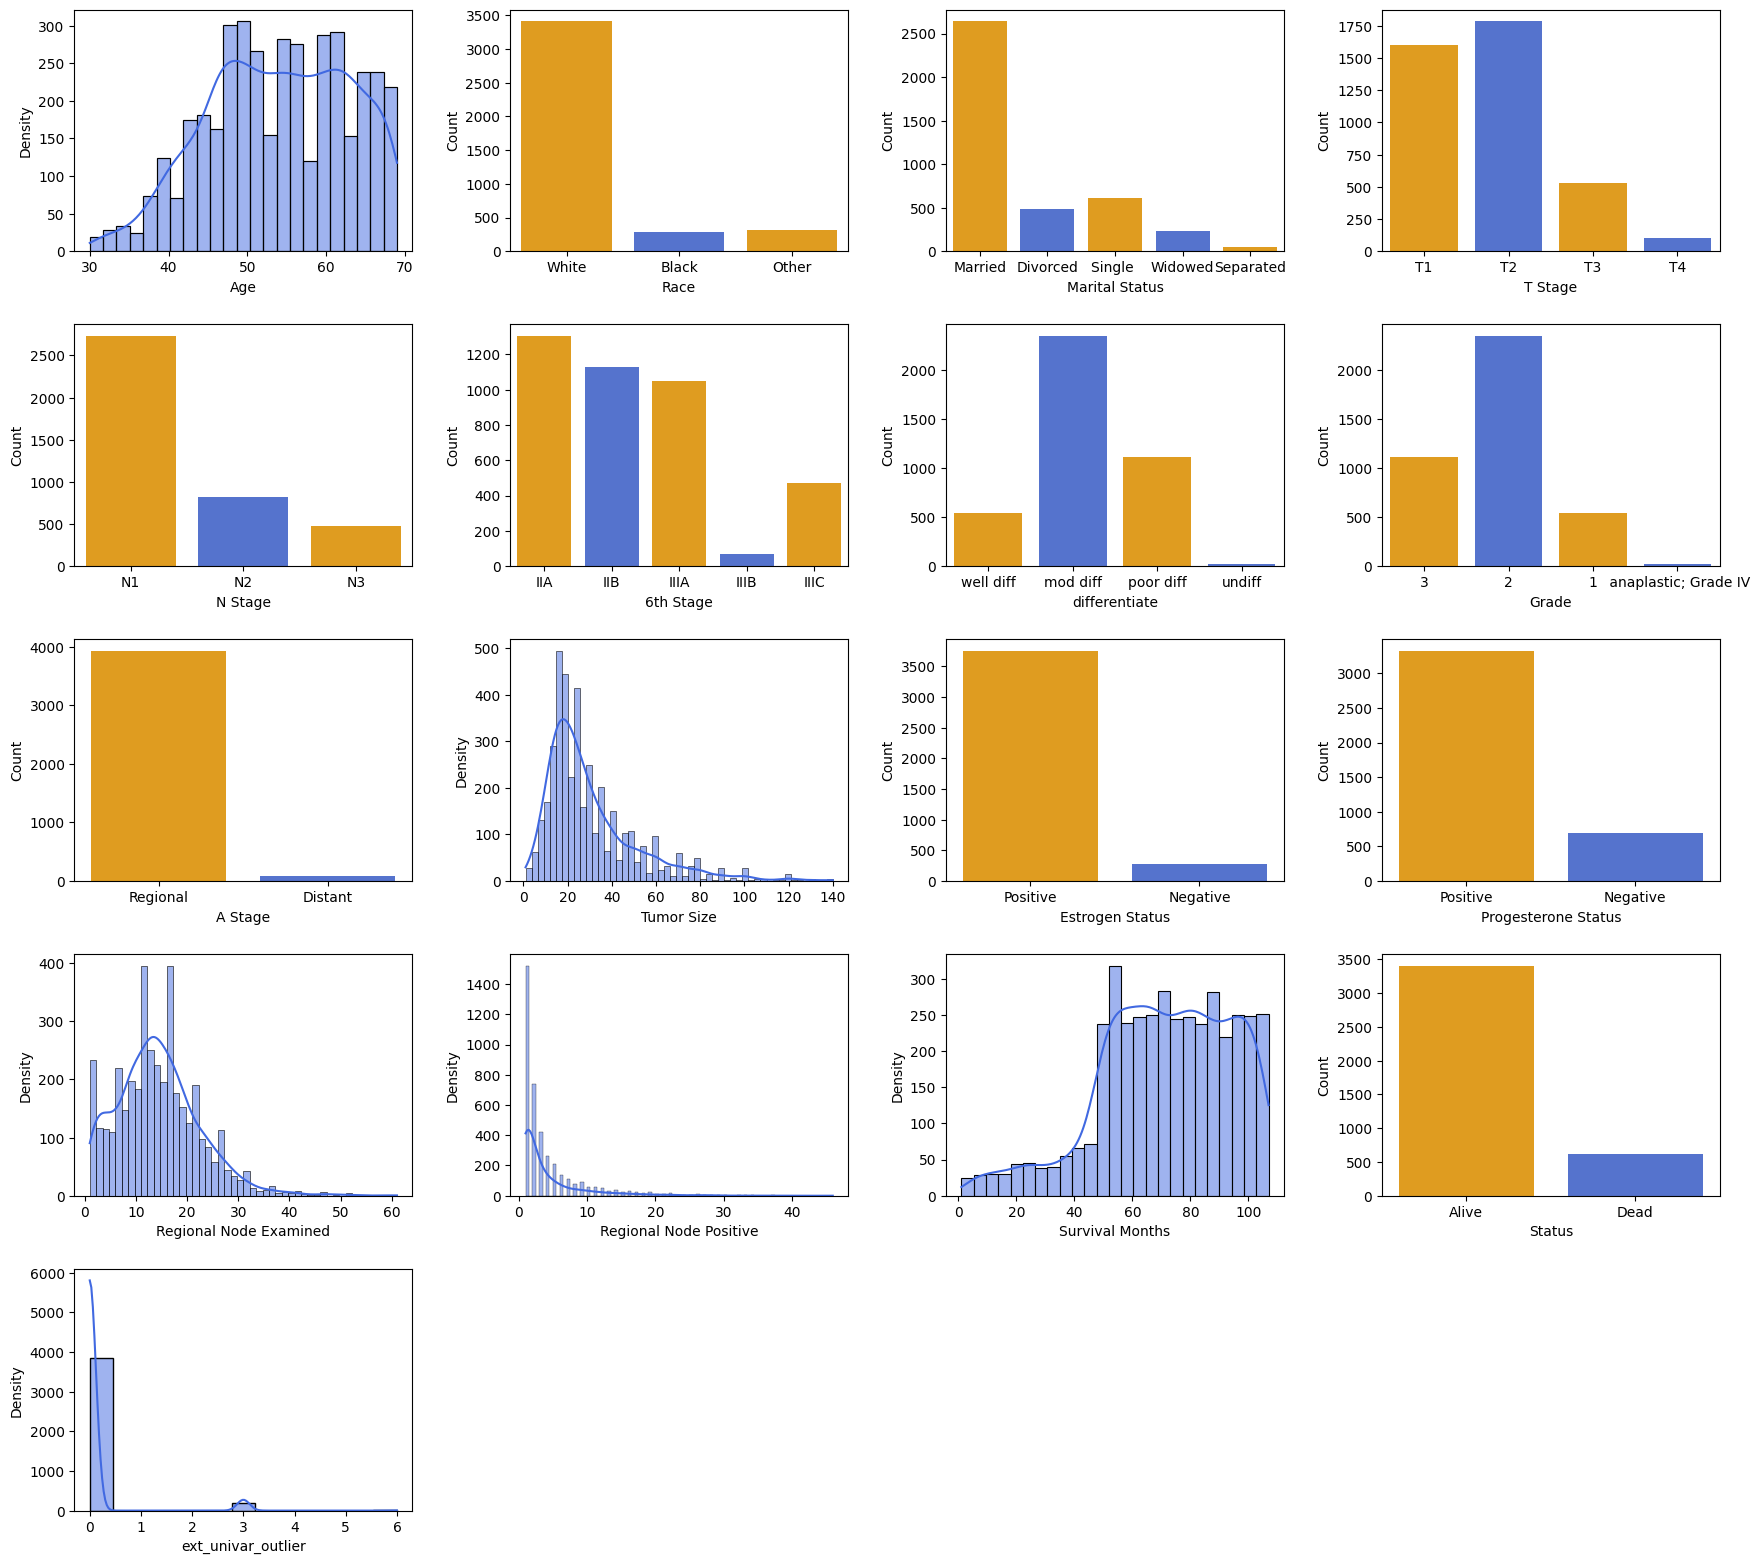

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def univariate_plot_dataframe(df, x=4, y=4):
    # Extract numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include='object').columns
    
    # Define custom color palette
    colors = ['#FFA500', '#4169E1']  # Orange and Blue
    
    # Calculate total number of plots
    total_plots = len(num_cols) + len(cat_cols)
    
    # Calculate the number of rows and columns needed
    rows = int(np.ceil(total_plots / x))
    cols = min(total_plots, x)
    
    # Create figure and axes
    fig, axes = plt.subplots(rows, cols, figsize=(18, 16))

    # Plot each variable
    plot_index = 0
    for col in df.columns:
        if col in cat_cols:
            # Plot categorical variables
            if col == 'differentiate':
                # change the names
                df[col] = df[col].replace({"Well differentiated": 'well diff', "Moderately differentiated": 'mod diff', 
                                           "Poorly differentiated": 'poor diff', "Undifferentiated": 'undiff'})
                # plot the graph following the order
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], order=['well diff', 'mod diff', 'poor diff', 'undiff'], palette=colors)
            elif col == '6th Stage':
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], order=['IIA','IIB','IIIA','IIIB','IIIC'], palette=colors)
            else:
                sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
            axes[plot_index // x, plot_index % x].set_xlabel(col)
            axes[plot_index // x, plot_index % x].set_ylabel('Count')
        elif col in num_cols:
            # Plot numerical variables
            sns.histplot(df[col], kde=True, color=colors[1], ax=axes[plot_index // x, plot_index % x])
            axes[plot_index // x, plot_index % x].set_xlabel(col)
            axes[plot_index // x, plot_index % x].set_ylabel('Density')
        plot_index += 1
    
    # Hide extra subplots if not needed
    for i in range(plot_index, rows * cols):
        axes[i // x, i % x].axis('off')
    
    # Adjust spacing between subplots
    plt.tight_layout(pad=2.0)

    # Display the plot without the messages
    plt.show()

# Assuming 'df' is your DataFrame
univariate_plot_dataframe(df)


C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14200\212448851.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=axes[plot_index // x, plot_index % x], palette=colors)
C:\Users\Admin\AppData\Local\Temp\ip

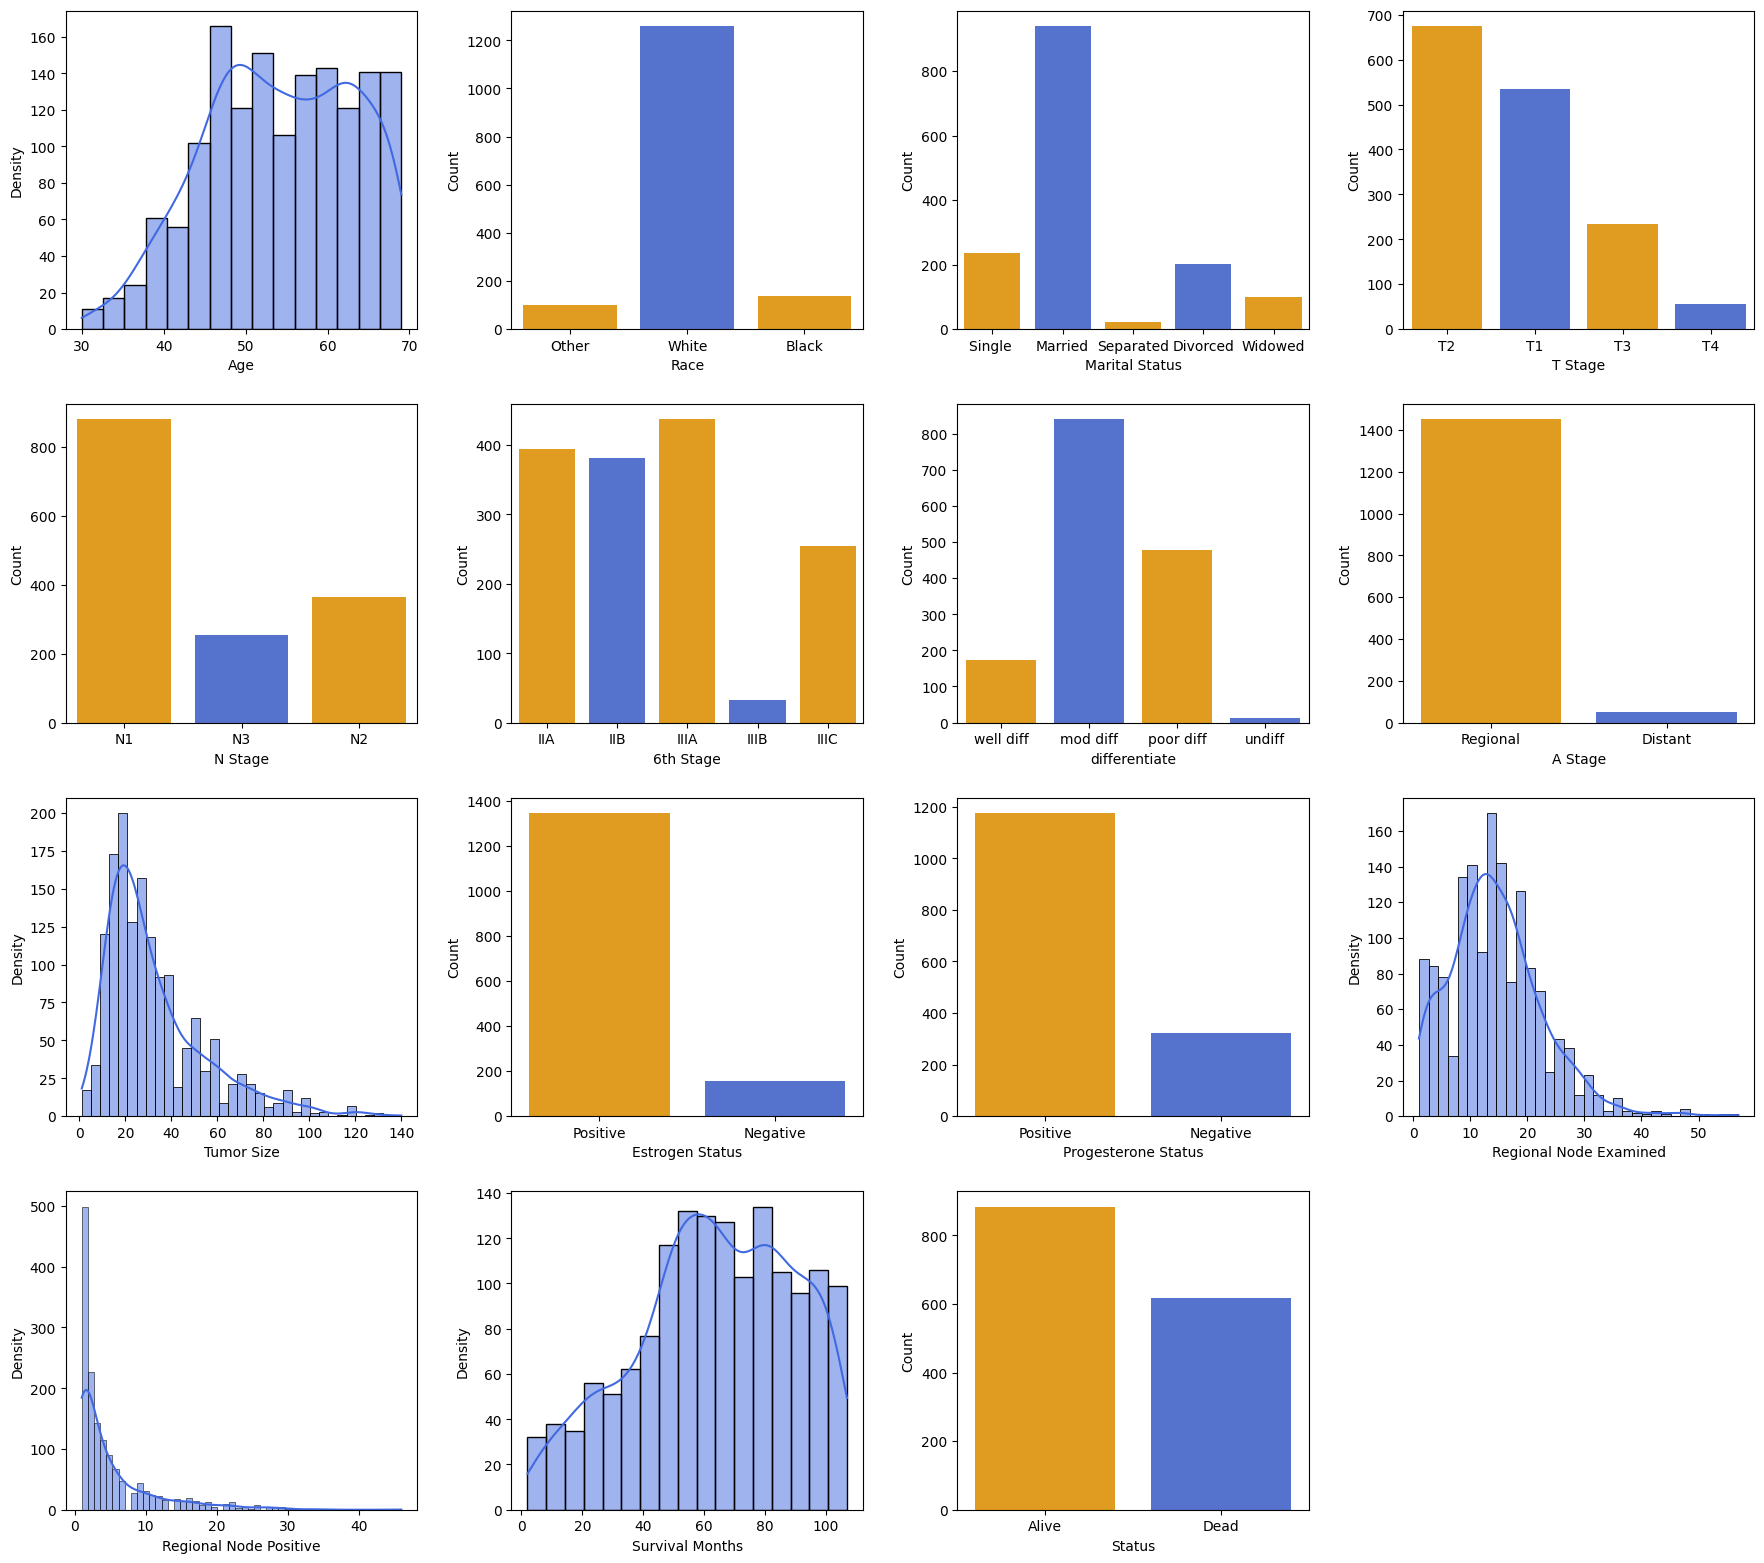

In [48]:
univariate_plot_dataframe(df_p)
